# IBM Data Science Professional Certificate Capstone Project
### Investing in Harlem Restaurants Based on Saturation of Cuisine 
This notebook contains the final capstone project submitted for the IBM Data Science Professional Certificate curriculum.

In this analysis I am assessing the availability of different cuisines in the neighborhood of Harlem in New York City. The purpose of this analysis is to be able to recommend, through clustering and segmentation, which types of cuisines have the best success in one of the most diverse neighborhoods of the city, so that any restauranteurs will know how likely they are to succeed. 

In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import requests 
import random 
import json
from project_lib import Project

from IPython.display import Image 
from IPython.core.display import HTML 
    
from pandas.io.json import json_normalize


import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

print('ready!')

ready!


Import and load data sets that will be needed for analysis:

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:

body = client_7c014d0c85434cc08ff0b9ff9aea6ccd.get_object(Bucket='datasciencecapstonenotebook-donotdelete-pr-re0m5m6so0mf8q',Key='us-zip-code-latitude-and-longitude.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )




In [4]:

body2 = client_7c014d0c85434cc08ff0b9ff9aea6ccd.get_object(Bucket='datasciencecapstonenotebook-donotdelete-pr-re0m5m6so0mf8q',Key='Manhattan Neighborhoods ZipCodes.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )



In [5]:
zipdata = pd.read_csv(body, sep=';')
zipdata.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,71937,Cove,AR,34.398483,-94.39398,-6,1,"34.398483,-94.39398"
1,72044,Edgemont,AR,35.624351,-92.16056,-6,1,"35.624351,-92.16056"
2,56171,Sherburn,MN,43.660847,-94.74357,-6,1,"43.660847,-94.74357"
3,49430,Lamont,MI,43.010337,-85.89754,-5,1,"43.010337,-85.89754"
4,52585,Richland,IA,41.194129,-91.98027,-6,1,"41.194129,-91.98027"


In [6]:
ManhattanNeighborhoods = pd.read_excel(body2)
ManhattanNeighborhoods.head()


,Zip,Neighborhood,Borough
0,10026,Central Harlem,Manhattan
1,10027,Central Harlem,Manhattan
2,10030,Central Harlem,Manhattan
3,10037,Central Harlem,Manhattan
4,10039,Central Harlem,Manhattan


Perform a join operation to reduce the dataset to only Zip Codes and corresponding latitudes, longitudes. 

In [7]:
ManhattanZipData = pd.merge(ManhattanNeighborhoods, zipdata, on='Zip',how='left')

In [8]:
ManhattanZipData.shape

(61, 10)

Since in this analysis I am focusing on Harlem, I will filter the data to only include Neighborhoods containing "Harlem".

In [9]:
HarlemData = ManhattanZipData[ManhattanZipData['Neighborhood'].str.contains('Harlem')]
HarlemData.head()

,Zip,Neighborhood,Borough,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,10026,Central Harlem,Manhattan,New York,NY,40.802853,-73.95471,-5.0,1.0,"40.802853,-73.95471"
1,10027,Central Harlem,Manhattan,New York,NY,40.812665,-73.95499,-5.0,1.0,"40.812665,-73.95499"
2,10030,Central Harlem,Manhattan,New York,NY,40.818151,-73.94351,-5.0,1.0,"40.818151,-73.94351"
3,10037,Central Harlem,Manhattan,New York,NY,40.813385,-73.93616,-5.0,1.0,"40.813385,-73.93616"
4,10039,Central Harlem,Manhattan,New York,NY,40.826181,-73.93710,-5.0,1.0,"40.826181,-73.9371"


In order to process these datasets through Foursquare, define function to handle the latitude and longitude data collected and loop them through queries, selecting out the data we want. We want to know which types of restaurants are located in Harlem.

In [10]:
# The code was removed by Watson Studio for sharing.

In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
       
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
    
        results = requests.get(url).json()['response']['groups'][0]['items']
        
       
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Run our list of Manhattan Zip Codes through the functions we just defined.

In [12]:
HarlemVenues = getNearbyVenues(names=HarlemData['Neighborhood'],
                                   latitudes=HarlemData['Latitude'],
                                   longitudes=HarlemData['Longitude']
                                  )

Central Harlem
Central Harlem
Central Harlem
Central Harlem
Central Harlem
East Harlem
East Harlem


In [13]:
HarlemVenues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central Harlem,40.802853,-73.95471,Bo's Bagels,40.804030,-73.954350,Bagel Shop
1,Central Harlem,40.802853,-73.95471,The Winery,40.804334,-73.955138,Wine Shop
2,Central Harlem,40.802853,-73.95471,Levain Bakery,40.804897,-73.955098,Bakery
3,Central Harlem,40.802853,-73.95471,Melba's American Comfort Food,40.802952,-73.956410,Southern / Soul Food Restaurant
4,Central Harlem,40.802853,-73.95471,67 Orange Street,40.802337,-73.956904,Speakeasy


In [14]:
HarlemVenues.shape

(297, 7)

Let's see how many different types of Venues are located in Harlem. We will need to filter out anything that is not related to restaurants.

In [15]:
HarlemVenues['Venue Category'].unique()

array(['Bagel Shop', 'Wine Shop', 'Bakery',
       'Southern / Soul Food Restaurant', 'Speakeasy',
       'Seafood Restaurant', 'Food Court', 'Italian Restaurant',
       'Middle Eastern Restaurant', 'Spa', 'African Restaurant', 'Park',
       'Coffee Shop', 'Boutique', 'Restaurant', 'Ethiopian Restaurant',
       'Spanish Restaurant', 'Cocktail Bar', 'Jazz Club',
       'Vegetarian / Vegan Restaurant', 'Mexican Restaurant',
       'Farmers Market', 'Wine Bar', 'Sports Bar', 'Playground',
       'Grocery Store', 'Dog Run', 'Bridge', 'History Museum',
       'Fish Market', 'Café', 'Plaza', 'Donut Shop', 'Indian Restaurant',
       'Supermarket', 'Historic Site', 'Sandwich Place', 'Hostel',
       'Fried Chicken Joint', 'Metro Station', 'Bike Trail',
       'Outdoor Sculpture', 'Salon / Barbershop', 'French Restaurant',
       'Yoga Studio', 'American Restaurant', 'Juice Bar', 'Garden',
       'Pizza Place', 'Ramen Restaurant', 'Chinese Restaurant',
       'Shoe Store', 'Gym', 'Bar', 'Ja

In [16]:
#Create a list of the venue categories that correspond with Restaurants:
Restaurants = ['Bagel Shop', 'Bakery',
       'Southern / Soul Food Restaurant', 'Seafood Restaurant', 'Food Court', 'Italian Restaurant',
       'Middle Eastern Restaurant',  'African Restaurant', 
       'Coffee Shop',  'Restaurant', 'Ethiopian Restaurant',
       'Spanish Restaurant', 'Cocktail Bar', 
       'Vegetarian / Vegan Restaurant', 'Mexican Restaurant',
        'Wine Bar', 'Sports Bar', 
       'Café', 'Donut Shop', 'Indian Restaurant',
      'Sandwich Place', 
       'Deli / Bodega', 'French Restaurant',
       'American Restaurant', 'Juice Bar',
       'Pizza Place', 'Ramen Restaurant', 'Chinese Restaurant',
        'Japanese Curry Restaurant',
        'Dumpling Restaurant', 'Tea Room', 
       'New American Restaurant', 'Falafel Restaurant',
       'Food Truck', 'Dessert Shop', 'Beer Bar',
       'Caribbean Restaurant', 'BBQ Joint',
       'Fried Chicken Joint', 'Burger Joint', 'Breakfast Spot',
      'Fast Food Restaurant',
       'Thai Restaurant', 'Latin American Restaurant',
       'Steakhouse', 'Cuban Restaurant', 'Moroccan Restaurant',
       'Taco Place', 'Kosher Restaurant', 
       'Diner', 
       'Ice Cream Shop']

In [17]:
#Create a new dataframe of only restaurants in Harlem
HarlemRestaurants = HarlemVenues[HarlemVenues['Venue Category'].isin(Restaurants)]
HarlemRestaurants.shape

(172, 7)

In [18]:
#Using One-Hot Encoding, Let's see how frequently each type of Venue occurs
HarlemFreq = pd.get_dummies(HarlemRestaurants[['Venue Category']],prefix="",prefix_sep="")
HarlemFreq.head()

,African Restaurant,American Restaurant,BBQ Joint,Bagel Shop,Bakery,Beer Bar,Breakfast Spot,Burger Joint,Café,Caribbean Restaurant,...,Seafood Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sports Bar,Steakhouse,Taco Place,Tea Room,Thai Restaurant,Vegetarian / Vegan Restaurant,Wine Bar
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#find the sum of each column, indicating the frequency of each type of restaurant
#transform to a dataframe
HarlemCount = HarlemFreq.sum().to_frame()
HarlemCount.head()

,0
African Restaurant,5
American Restaurant,7
BBQ Joint,1
Bagel Shop,3
Bakery,5


Let's see how restaurants compare to total businesses operating in Harlem currently by plotting out the Foursquare Data:

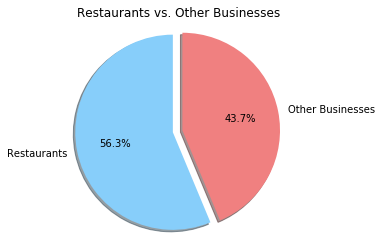

In [21]:
import matplotlib.pyplot as plt 
labels = 'Restaurants','Other Businesses'
sizes = [170,132]
colors = ['lightskyblue','lightcoral']
explode = (0.1,0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,
        autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')
plt.title('Restaurants vs. Other Businesses')
plt.show()

Clean up the Dataframe for analysis. Reset index and rename columns for better visualizations:

In [22]:
HarlemCount.reset_index(inplace=True)

In [23]:
HarlemCount.head()

,index,0
0,African Restaurant,5
1,American Restaurant,7
2,BBQ Joint,1
3,Bagel Shop,3
4,Bakery,5


In [24]:
HarlemCount.rename(columns={'index':'Cuisine Type',0:'Count'},inplace=True)
HarlemCount.head()

,Cuisine Type,Count
0,African Restaurant,5
1,American Restaurant,7
2,BBQ Joint,1
3,Bagel Shop,3
4,Bakery,5


Group restaurants by cuisine type and cateogory.

In [25]:
HarlemCount['Cuisine Type'].unique()

array(['African Restaurant', 'American Restaurant', 'BBQ Joint',
       'Bagel Shop', 'Bakery', 'Beer Bar', 'Breakfast Spot',
       'Burger Joint', 'Café', 'Caribbean Restaurant',
       'Chinese Restaurant', 'Cocktail Bar', 'Coffee Shop',
       'Cuban Restaurant', 'Deli / Bodega', 'Dessert Shop', 'Diner',
       'Donut Shop', 'Dumpling Restaurant', 'Ethiopian Restaurant',
       'Falafel Restaurant', 'Fast Food Restaurant', 'Food Court',
       'Food Truck', 'French Restaurant', 'Fried Chicken Joint',
       'Ice Cream Shop', 'Indian Restaurant', 'Italian Restaurant',
       'Japanese Curry Restaurant', 'Juice Bar', 'Kosher Restaurant',
       'Latin American Restaurant', 'Mexican Restaurant',
       'Middle Eastern Restaurant', 'Moroccan Restaurant',
       'New American Restaurant', 'Pizza Place', 'Ramen Restaurant',
       'Restaurant', 'Sandwich Place', 'Seafood Restaurant',
       'Southern / Soul Food Restaurant', 'Spanish Restaurant',
       'Sports Bar', 'Steakhouse', 'Taco 

In [26]:
FullServiceRestaurant = ['African Restaurant', 'American Restaurant','Caribbean Restaurant',
       'Chinese Restaurant','Cuban Restaurant','Dumpling Restaurant', 'Ethiopian Restaurant',
       'Falafel Restaurant','French Restaurant','Indian Restaurant', 'Italian Restaurant',
       'Japanese Curry Restaurant','Kosher Restaurant',
       'Latin American Restaurant', 'Mexican Restaurant',
       'Middle Eastern Restaurant', 'Moroccan Restaurant',
       'New American Restaurant','Ramen Restaurant','Restaurant','Seafood Restaurant',
       'Southern / Soul Food Restaurant', 'Spanish Restaurant', 'Steakhouse',
        'Thai Restaurant', 'Vegetarian / Vegan Restaurant']
FastFood = ['Fast Food Restaurant', 'Food Court','Food Truck']
FastCasual = ['BBQ Joint','Bagel Shop', 'Bakery', 'Beer Bar', 'Breakfast Spot',
       'Burger Joint', 'Café','Cocktail Bar', 'Coffee Shop','Deli / Bodega', 'Dessert Shop', 'Diner',
       'Donut Shop','Fried Chicken Joint','Ice Cream Shop','Juice Bar','Pizza Place', 
              'Sandwich Place','Sports Bar','Taco Place', 'Tea Room','Wine Bar']


Run a For Loop to engineer a new feature for the Harlem Restaurant Count Dataframe based on the newly assigned categories.

In [27]:
result = [] 
for value in HarlemCount["Cuisine Type"]: 
    if value in FullServiceRestaurant: 
        result.append("Full Service") 
    elif value in FastCasual: 
        result.append("Fast Casual") 
    else: 
        result.append("Fast Food") 
       
HarlemCount["Service Type"] = result 

In [28]:
HarlemCount.head()

,Cuisine Type,Count,Service Type
0,African Restaurant,5,Full Service
1,American Restaurant,7,Full Service
2,BBQ Joint,1,Fast Casual
3,Bagel Shop,3,Fast Casual
4,Bakery,5,Fast Casual


In [29]:
HarlemCount['Service Type'].value_counts()

Full Service    26
Fast Casual     22
Fast Food        3
Name: Service Type, dtype: int64

In [30]:
ServiceTypes=['Full Service','Fast Casual','Fast Food']
values= [26,22,3]

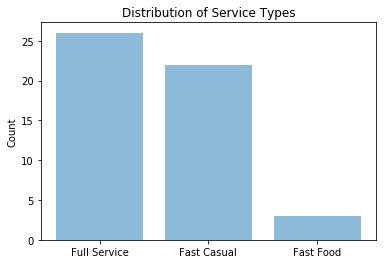

In [31]:
plt.bar(ServiceTypes, height=values, align='center', alpha=0.5)
plt.ylabel('Count')
plt.title('Distribution of Service Types')

plt.show()

Input popularity scores for types of cuisines (pulled from Google Survey Results).

In [32]:
HarlemCount
PopularityScores = [40,75,50,70,30,10,15,60,20,50,63,45,75,10,5,5,63,45,45,10,10,10,20,60,20,11,38,10.5,10,25,35,59,45,30,40,35,45,17,45,36,59,64,24,20,10,64,53,20,25,25,10]

In [33]:
HarlemCount['Popularity Score'] = PopularityScores

In [34]:
HarlemCount.head()

,Cuisine Type,Count,Service Type,Popularity Score
0,African Restaurant,5,Full Service,40.0
1,American Restaurant,7,Full Service,75.0
2,BBQ Joint,1,Fast Casual,50.0
3,Bagel Shop,3,Fast Casual,70.0
4,Bakery,5,Fast Casual,30.0


Run K-Means Clustering to group cuisine types.

In [35]:
#Transfer Types of Service to integers for modeling
Type = [] 
for value in HarlemCount["Service Type"]: 
    if value == 'Full Service': 
        Type.append(1) 
    elif value == 'Fast Casual': 
        Type.append(2) 
    else: 
        Type.append(3) 
       
HarlemCount["Type"] = Type

In [36]:
#Create new frame without Service Type column to model
HarlemModel=HarlemCount.drop('Service Type',1)
HarlemModel.head()

,Cuisine Type,Count,Popularity Score,Type
0,African Restaurant,5,40.0,1
1,American Restaurant,7,75.0,1
2,BBQ Joint,1,50.0,2
3,Bagel Shop,3,70.0,2
4,Bakery,5,30.0,2


In [37]:
HarlemCopy=HarlemModel.copy()

In [38]:
HarlemCopy.drop('Cuisine Type',1,inplace=True)

In [39]:
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(HarlemCopy)

In [40]:
kmeans.labels_

array([0, 4, 0, 4, 1, 3, 3, 2, 1, 0, 2, 0, 4, 3, 3, 3, 2, 0, 0, 3, 3, 3,
       1, 2, 1, 3, 0, 3, 3, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 1, 1,
       3, 2, 2, 1, 1, 1, 3], dtype=int32)

In [41]:
HarlemModel.head()

,Cuisine Type,Count,Popularity Score,Type
0,African Restaurant,5,40.0,1
1,American Restaurant,7,75.0,1
2,BBQ Joint,1,50.0,2
3,Bagel Shop,3,70.0,2
4,Bakery,5,30.0,2


In [42]:
#add the clustering labels back into the dataframe
HarlemModel.insert(0,'Cluster Labels',kmeans.labels_)

In [43]:
HarlemModel.head()

,Cluster Labels,Cuisine Type,Count,Popularity Score,Type
0,0,African Restaurant,5,40.0,1
1,4,American Restaurant,7,75.0,1
2,0,BBQ Joint,1,50.0,2
3,4,Bagel Shop,3,70.0,2
4,1,Bakery,5,30.0,2


In [170]:
Types = [] 
for value in HarlemCount["Type"]: 
    if value == 1: 
        Types.append('Full Service') 
    elif value == 2: 
        Types.append('Fast Casual') 
    else: 
        Types.append('Fast Food') 
       
HarlemModel["Service Type"] = Types

In [171]:
HarlemModel.head()

,Cluster Labels,Cuisine Type,Count,Popularity Score,Type,Service Type
0,0,African Restaurant,5,40.0,1,Full Service
1,4,American Restaurant,7,75.0,1,Full Service
2,0,BBQ Joint,1,50.0,2,Fast Casual
3,4,Bagel Shop,3,70.0,2,Fast Casual
4,1,Bakery,5,30.0,2,Fast Casual


In [44]:
HarlemZero = HarlemModel[HarlemModel['Cluster Labels'] == 0]
HarlemOne = HarlemModel[HarlemModel['Cluster Labels'] == 1]
HarlemTwo = HarlemModel[HarlemModel['Cluster Labels'] == 2]
HarlemThree = HarlemModel[HarlemModel['Cluster Labels'] == 3]
HarlemFour = HarlemModel[HarlemModel['Cluster Labels'] == 4]

Visualizing the Model Results

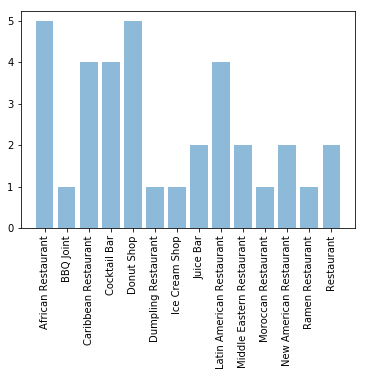

<Figure size 3600x1800 with 0 Axes>

In [45]:
plt.bar(HarlemZero['Cuisine Type'],HarlemZero['Count'],align='center',alpha=0.5)
plt.xticks(rotation=90)
plt.figure(figsize=(50,25))
plt.show()

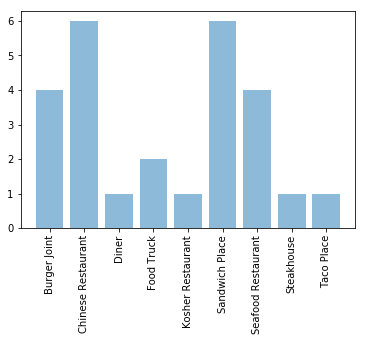

<Figure size 3600x1800 with 0 Axes>

In [46]:
plt.bar(HarlemTwo['Cuisine Type'],HarlemTwo['Count'],align='center',alpha=0.5)
plt.xticks(rotation=90)
plt.figure(figsize=(50,25))
plt.show()

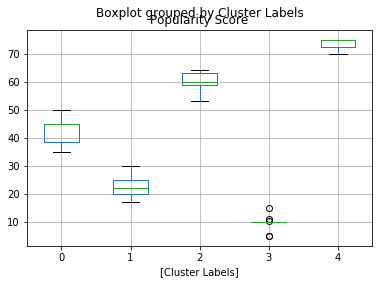

In [54]:
boxplot = HarlemModel.boxplot(column=['Popularity Score'], by=['Cluster Labels'])

In [59]:
sorteddf = HarlemModel.sort_values(by=['Count'],ascending=False)
TopCuisines = sorteddf.head(10)

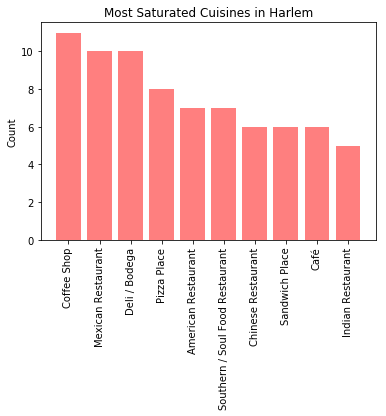

In [74]:
import matplotlib as mp

data_normalizer = mp.colors.Normalize()
color_map = mp.colors.LinearSegmentedColormap(
    "my_map",
    {
        "red": [(0, 1.0, 1.0),
                (1.0, .5, .5)],
        "green": [(0, 0.5, 0.5),
                  (1.0, 0, 0)],
        "blue": [(0, 0.50, 0.5),
                 (1.0, 0, 0)]
    }
)

fig=plt.bar(TopCuisines['Cuisine Type'],TopCuisines['Count'],color=color_map(TopCuisines['Type']))
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Most Saturated Cuisines in Harlem')
plt.show(fig)

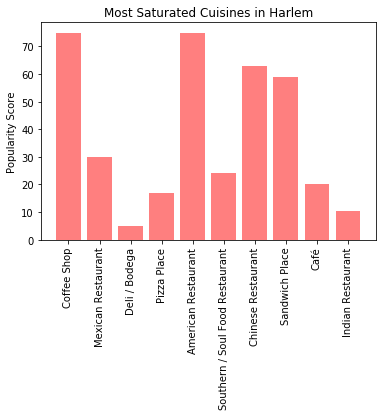

In [75]:
fig=plt.bar(TopCuisines['Cuisine Type'],TopCuisines['Popularity Score'],color=color_map(TopCuisines['Type']))
plt.xticks(rotation=90)
plt.ylabel('Popularity Score')
plt.title('Most Saturated Cuisines in Harlem')
plt.show(fig)

In [77]:
sortedpop = HarlemModel.sort_values(by=['Popularity Score'],ascending=False)
TopPop = sortedpop.head(10)

In [78]:
TopPop

,Cluster Labels,Cuisine Type,Count,Popularity Score,Type
1,4,American Restaurant,7,75.0,1
12,4,Coffee Shop,11,75.0,2
3,4,Bagel Shop,3,70.0,2
45,2,Steakhouse,1,64.0,1
41,2,Seafood Restaurant,4,64.0,1
10,2,Chinese Restaurant,6,63.0,1
16,2,Diner,1,63.0,2
7,2,Burger Joint,4,60.0,2
23,2,Food Truck,2,60.0,3
31,2,Kosher Restaurant,1,59.0,1


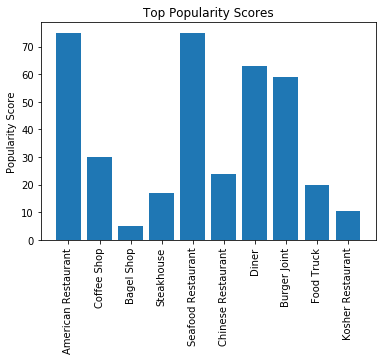

In [79]:
fig=plt.bar(TopPop['Cuisine Type'],TopCuisines['Popularity Score'])
plt.xticks(rotation=90)
plt.ylabel('Popularity Score')
plt.title('Top Popularity Scores')
plt.show(fig)

Review the selected Cluster: Cluster 2

In [80]:
HarlemTwo

,Cluster Labels,Cuisine Type,Count,Popularity Score,Type
7,2,Burger Joint,4,60.0,2
10,2,Chinese Restaurant,6,63.0,1
16,2,Diner,1,63.0,2
23,2,Food Truck,2,60.0,3
31,2,Kosher Restaurant,1,59.0,1
40,2,Sandwich Place,6,59.0,2
41,2,Seafood Restaurant,4,64.0,1
45,2,Steakhouse,1,64.0,1
46,2,Taco Place,1,53.0,2


In [ ]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 